<a href="https://colab.research.google.com/github/selfor21/COM420/blob/main/COM520_Desafio02_Modelo02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COM520 - Aprendizado Profundo

## Desafio - Semana 02 - Modelo 02

### Redes Convolucionais

- Carregamento dos pacotes necessários
- Carregamento dos dados (MNIST)
- Desenvolvimento de um modelo CNN



# Pacotes

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import keras.datasets as kds
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd

In [ ]:
test_loss_l = []
test_acc_l = []
activation_l = []
history_l = []

# Carregamento dos Dados

## MNIST (Digitos)

### Um dataset público com 70000 exemplos (60K Treino / 10K Teste)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

Ver: http://yann.lecun.com/exdb/mnist/

## Dados

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

# Carga dos dados (keras.datasets)
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Normalização das features
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Conversão das classes em vetores one-hot-encoding 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 0s 0us/step


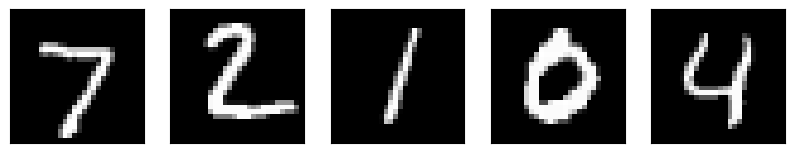

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Modelo 02 - MLP - 100 relu + 10 softmax

In [ ]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Flatten(input_shape=input_shape))
modelo2.add(keras.layers.Dense(units=100, activation="relu"))
modelo2.add(keras.layers.Dense(units=10, activation="softmax"))

modelo2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Grafo da rede gerada
tf.keras.utils.plot_model(modelo2, show_shapes=True)

In [ ]:
modelo2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = modelo2.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 3s - loss: 0.5241 - accuracy: 0.8580 - val_loss: 0.2638 - val_accuracy: 0.9289 - 3s/epoch - 14ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2450 - accuracy: 0.9314 - val_loss: 0.2052 - val_accuracy: 0.9444 - 1s/epoch - 7ms/step
Epoch 3/30
188/188 - 1s - loss: 0.1903 - accuracy: 0.9471 - val_loss: 0.1804 - val_accuracy: 0.9506 - 1s/epoch - 6ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1564 - accuracy: 0.9558 - val_loss: 0.1520 - val_accuracy: 0.9579 - 1s/epoch - 6ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1330 - accuracy: 0.9628 - val_loss: 0.1393 - val_accuracy: 0.9601 - 1s/epoch - 6ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1159 - accuracy: 0.9675 - val_loss: 0.1330 - val_accuracy: 0.9623 - 1s/epoch - 6ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1012 - accuracy: 0.9719 - val_loss: 0.1199 - val_accuracy: 0.9669 - 1s/epoch - 6ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0892 - accuracy: 0.9753 - val_loss: 0.1107 - val_accuracy: 0.9686 - 1s/epoch - 6ms/step
Epoch 9/30
188/188 - 1s

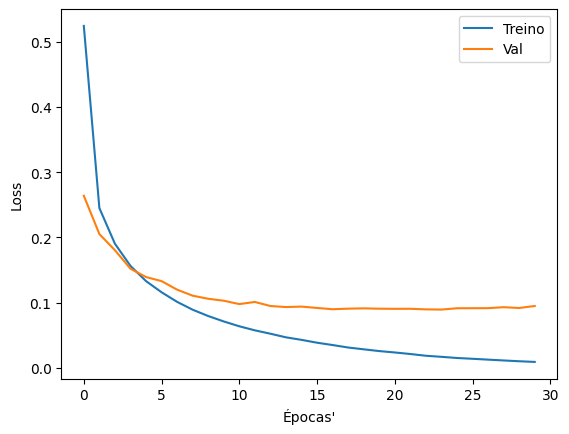

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history2.history['loss'], label="Treino")
plt.plot(history2.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [ ]:
# Avaliação do modelo treinado no conjunto de tete
print("Avaliação do modelo (Teste)")
results2 = modelo2.evaluate(x_test, y_test)
print("Test loss, Test acc:", results2)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9755
Test loss, Test acc: [0.09160944819450378, 0.9754999876022339]


In [ ]:
activation_l.append('100relu + 10softmax')
test_loss_l.append(results2[0])
test_acc_l.append(results2[1])

#Modelo 03 - reduzindo a qtde neuronios para 80

In [ ]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Flatten(input_shape=input_shape))
modelo3.add(keras.layers.Dense(units=80, activation="relu"))
modelo3.add(keras.layers.Dense(units=10, activation="softmax"))

modelo3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 80)                62800     
                                                                 
 dense_11 (Dense)            (None, 10)                810       
                                                                 
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history3 = modelo3.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 3s - loss: 0.5523 - accuracy: 0.8501 - val_loss: 0.2731 - val_accuracy: 0.9228 - 3s/epoch - 14ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2549 - accuracy: 0.9281 - val_loss: 0.2213 - val_accuracy: 0.9372 - 1s/epoch - 6ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2011 - accuracy: 0.9430 - val_loss: 0.1838 - val_accuracy: 0.9489 - 1s/epoch - 5ms/step
Epoch 4/30
188/188 - 1s - loss: 0.1670 - accuracy: 0.9532 - val_loss: 0.1619 - val_accuracy: 0.9555 - 991ms/epoch - 5ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1430 - accuracy: 0.9594 - val_loss: 0.1467 - val_accuracy: 0.9581 - 998ms/epoch - 5ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1249 - accuracy: 0.9647 - val_loss: 0.1345 - val_accuracy: 0.9619 - 957ms/epoch - 5ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1099 - accuracy: 0.9697 - val_loss: 0.1249 - val_accuracy: 0.9643 - 990ms/epoch - 5ms/step
Epoch 8/30
188/188 - 1s - loss: 0.0978 - accuracy: 0.9735 - val_loss: 0.1199 - val_accuracy: 0.9649 - 945ms/epoch - 5ms/step
Epoch 9/

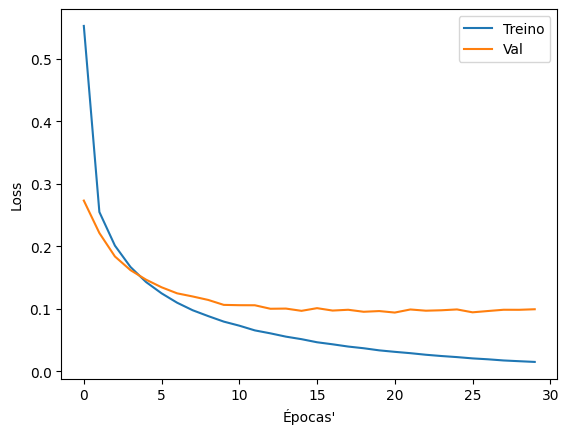

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history3.history['loss'], label="Treino")
plt.plot(history3.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [ ]:
#Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results3 = modelo3.evaluate(x_test, y_test)
print("Test loss, Test acc:", results3)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9740
Test loss, Test acc: [0.09247112274169922, 0.9739999771118164]


In [ ]:
activation_l.append('80relu + 10softmax')
test_loss_l.append(results3[0])
test_acc_l.append(results3[1])

In [ ]:
modelo4 = keras.Sequential()
modelo4.add(keras.layers.Flatten(input_shape=input_shape))
modelo4.add(keras.layers.Dense(units=50, activation="relu"))
modelo4.add(keras.layers.Dense(units=10, activation="softmax"))

modelo4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                39250     
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history4 = modelo4.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 2s - loss: 0.6382 - accuracy: 0.8248 - val_loss: 0.3078 - val_accuracy: 0.9162 - 2s/epoch - 9ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2856 - accuracy: 0.9200 - val_loss: 0.2413 - val_accuracy: 0.9332 - 876ms/epoch - 5ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2324 - accuracy: 0.9352 - val_loss: 0.2116 - val_accuracy: 0.9407 - 861ms/epoch - 5ms/step
Epoch 4/30
188/188 - 1s - loss: 0.2003 - accuracy: 0.9438 - val_loss: 0.1856 - val_accuracy: 0.9484 - 824ms/epoch - 4ms/step
Epoch 5/30
188/188 - 1s - loss: 0.1765 - accuracy: 0.9500 - val_loss: 0.1705 - val_accuracy: 0.9525 - 1s/epoch - 7ms/step
Epoch 6/30
188/188 - 1s - loss: 0.1587 - accuracy: 0.9546 - val_loss: 0.1608 - val_accuracy: 0.9542 - 1s/epoch - 7ms/step
Epoch 7/30
188/188 - 1s - loss: 0.1430 - accuracy: 0.9590 - val_loss: 0.1489 - val_accuracy: 0.9578 - 983ms/epoch - 5ms/step
Epoch 8/30
188/188 - 1s - loss: 0.1307 - accuracy: 0.9632 - val_loss: 0.1419 - val_accuracy: 0.9594 - 899ms/epoch - 5ms/step
Epoch 9/3

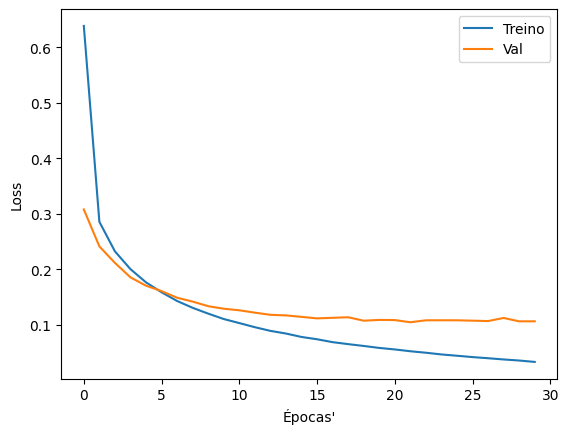

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history4.history['loss'], label="Treino")
plt.plot(history4.history['val_loss'], label="Val")
plt.legend()
plt.show()


In [ ]:
#Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results4 = modelo4.evaluate(x_test, y_test)
print("Test loss, Test acc:", results3)


Avaliação do modelo (Teste)
313/313 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9716
Test loss, Test acc: [0.10830125957727432, 0.9761000275611877]


In [ ]:
activation_l.append('50relu + 10softmax')
test_loss_l.append(results4[0])
test_acc_l.append(results4[1])

In [ ]:
results1_df = pd
results1_df = pd.DataFrame(activation_l, columns=['activation'])
results1_df['test_loss'] = test_loss_l
results1_df['test_acc'] = test_acc_l

In [ ]:
results1_df

,activation,test_loss,test_acc
0,100relu + 10softmax,0.091609,0.9755
1,80relu + 10softmax,0.092471,0.9740
2,50relu + 10softmax,0.093318,0.9716


Da tabela acima, observamos que a utilização de 100, 80 ou 50 neurônios na camada oculta, gerou o mesmo nível de acurácia.